# <font color="#8333ff">PROJET 05 | PARTIE 1 ANALYSE EXPLORATOIRE
    

Dans cet première partie nous allons nous familiariser avec la base de données. L'objectif est d'arriver à une table unique comportant une ligne pour chaque client et autant de colonnes que d'attribut pertinents pour notre modèle de classification

**Sommaire** <br>

>[1-CHARGEMENT DES DONNEES](#1-CHARGEMENT-DES-DONNEES)<br>
>> [Jointure des tables](#Jointure-des-tables)<br />
>> [Analyse des doublons](#Analyse-des-doublons)<br />
>> [Analyse des valeurs nulles](#Analyse-des-valeurs-nulles)<br>  

>[2-CONSTRUCTION DES NOUVELLES VARIABLES](#2-CONSTRUCTION-DES-NOUVELLES-VARIABLES)<br>
>> [Encodage des variables catégorielles](#Encodage-des-variables-catégorielles)<br />
>> [Traitement des valeurs manquantes](#Traitement-des-valeurs-manquantes)<br />

>[3-ANALYSES EXPLORATOIRES](#3-ANALYSES-EXPLORATOIRES)<br>

>[4-PRE-TRAITEMENT DES DONNEES POUR LE CLUSTERING](#4-PRE-TRAITEMENT-DES-DONNEES-POUR-LE-CLUSTERING)
>>[Normalisation des variables numériques](#Normalisation-des-variables-numériques)<br />
>>[Analyse des corrélations](#Analyse-des-corrélations)

In [1]:
import pandas as pd
import numpy as np
import sqlite3


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
# pd.set_option('max_colwidth', 400)
# https://www.kaggle.com/code/kabure/simple-eda-sales-and-customer-patterns#Starting-EDA:

# 1-CHARGEMENT DES DONNEES

Nous commençons par charger les données pour aboutir à une table unique où une ligne correspond à un client

In [2]:
# connection à la base SQLite
conn = sqlite3.connect('olist.db')

In [3]:
table_list = ['orders', 'order_items',
              'order_reviews', 'customers', 'sellers', 'geoloc', 'order_pymts', 'products']
df = {}

for i in table_list:

    # Exécuter une requête SQL pour sélectionner toutes les données de la table spécifiée
    query = f"SELECT * FROM {i};"

    # Utiliser Pandas pour importer les données dans un DataFrame
    df[i] = pd.read_sql_query(query, conn, index_col='index')

    # Fermer la connexion à la base de données

    # Afficher le DataFrame contenant les données de la table

for table_name, dataframe in df.items():
    locals()[f"df_{table_name}"] = dataframe

In [4]:
df_info = []

# Itéreration sur chaque nom de table
for table_name in table_list:
    # Récupéreration du DataFrame correspondant
    dataframe = locals()[f"df_{table_name}"]

    # Extraiction du nombre de lignes et de colonnes
    rows = dataframe.shape[0]
    cols = dataframe.shape[1]

    # Ajouter les informations à la liste
    df_info.append(pd.DataFrame(
        {'rows': [rows], 'cols': [cols]}, index=[table_name]))

# Concaténation des DataFrames de la liste en un seul DataFrame
summary_df = pd.concat(df_info)

In [5]:
summary_df

,rows,cols
orders,99441,8
order_items,112650,7
order_reviews,99224,7
customers,99441,5
sellers,3095,4
geoloc,1000163,5
order_pymts,103886,5
products,32951,9


## Jointure des tables

In [6]:
df_train = df_customers.merge(df_orders, on='customer_id', how='left')
df_train = df_train.merge(df_order_reviews, on='order_id', how='left')
df_train = df_train.merge(df_order_items, on='order_id', how='left')
df_train = df_train.merge(df_products, on='product_id', how='left')
df_train = df_train.merge(df_sellers, on='seller_id', how='left')
df_train = df_train.merge(df_order_pymts, on='order_id',
                          how='left', validate='m:m')

In [7]:
df_train.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,119143.000000,118146.000000,118310.000000,118310.000000,118310.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,119140.000000,119140.000000,119140.000000
mean,35033.451298,4.015582,1.196543,120.646603,20.032387,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413,1.094737,2.941246,172.735135
std,29823.198969,1.400436,0.699489,184.109691,15.836850,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511,0.730141,2.777848,267.776077
min,1003.000000,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,0.000000,0.000000
25%,11250.000000,4.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,1.000000,1.000000,60.850000
50%,24240.000000,5.000000,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,1.000000,2.000000,108.160000
75%,58475.000000,5.000000,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,1.000000,4.000000,189.240000
max,99990.000000,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,29.000000,24.000000,13664.080000


## Analyse des doublons

In [8]:
df_train.duplicated().sum()

0

In [9]:
categorical_features = []
numerical_features = []
for i in df_train.columns.tolist():
    if df_train[i].dtype == 'object':
        categorical_features.append(i)
    else:
        numerical_features.append(i)
print('Nombre de varaibles catégorielles:' + str(len(categorical_features)))
print('Nombre de variables numériques :', str(len(numerical_features)))

Nombre de varaibles catégorielles:23
Nombre de variables numériques : 16


## Analyse des valeurs nulles

In [10]:
pd.DataFrame({
    "Modalités": df_train[categorical_features].nunique(),
    "0": (df_train == 0).mean(),
    "Null %": df_train.isna().mean()}).sort_values(by="Null %", ascending=False)

,Modalités,0,Null %
review_comment_title,4527.0,0.000000,0.882586
review_comment_message,36159.0,0.000000,0.578280
order_delivered_customer_date,95664.0,0.000000,0.028713
product_category_name,73.0,0.000000,0.021336
product_name_lenght,NaN,0.000000,0.021336
product_photos_qty,NaN,0.000000,0.021336
product_description_lenght,NaN,0.000000,0.021336
order_delivered_carrier_date,81018.0,0.000000,0.017508
review_score,NaN,0.000000,0.008368
review_id,98410.0,0.000000,0.008368


## Conversion des dates

In [11]:
df_train[['order_delivered_customer_date',
          'order_purchase_timestamp',
          'order_estimated_delivery_date']] = df_train[[
              'order_delivered_customer_date',
              'order_purchase_timestamp',
              'order_estimated_delivery_date']].apply(pd.to_datetime)

# 2-CONSTRUCTION DES NOUVELLES VARIABLES

Nous allons nous focaliser sur les métriques de la ségmentation RFM. Ces indicateurs seront enrichis par d'autres indicateurs permettant d'apporter une interprétation explicite des différents groupes de clients.

>La segmentation RFM prend en compte : <br><br>
la **Récence** (date de la dernière commande),<br>
la **Fréquence** des commandes et <br>le **Montant** (de la dernière commande ou sur une période donnée)<br>pour établir des segments de clients homogènes.

In [12]:
# nb jours écoulés depuis la dernière commande
recency = pd.to_datetime(df_train.groupby(
    'customer_unique_id')['order_purchase_timestamp'].max())

df_train['recency'] = pd.to_datetime(df_train['order_purchase_timestamp'].max(
)) - df_train['customer_unique_id'].map(recency)

df_train['recency'] = df_train['recency'].dt.days


# delais de livraison
df_train['delivery_time'] = df_train['order_delivered_customer_date'] - \
    df_train['order_purchase_timestamp']

avg_delivery_time = df_train.groupby(
    'customer_unique_id')['delivery_time'].mean()

df_train['delivery_time'] = df_train['customer_unique_id'].map(
    avg_delivery_time)

df_train['delivery_time'] = df_train['delivery_time'].dt.days


# retard de livraison
df_train['delay'] = df_train['order_estimated_delivery_date'] - \
    df_train['order_delivered_customer_date']

avg_delay = df_train.groupby(
    'customer_unique_id')['delay'].mean()

df_train['delay'] = df_train['customer_unique_id'].map(
    avg_delay)
df_train['delay'] = df_train['delay'].dt.days


# dépense par client
monetary = df_train.groupby('customer_unique_id')[
    'payment_value'].sum()

df_train['monetary'] = df_train['customer_unique_id'].map(
    monetary)

# nombre de commandes par client
frequency = df_train.groupby('customer_unique_id')[
    'order_id'].nunique()

df_train['frequency'] = df_train['customer_unique_id'].map(
    frequency)


# Volume produit
df_train['product_volume'] = df_train['product_height_cm'] * \
    df_train['product_width_cm'] * df_train['product_length_cm']

avg_prod_vol = df_train.groupby('customer_unique_id')[
    'product_volume'].mean()

df_train['avg_prod_vol'] = df_train['customer_unique_id'].map(
    avg_prod_vol)

# Poids moyen article par client
avg_prod_weight = df_train.groupby('customer_unique_id')[
    'product_weight_g'].mean()

df_train['avg_prod_weight'] = df_train['customer_unique_id'].map(
    avg_prod_weight)

# score median avis utilisateur
median_review_score = df_train.groupby('customer_unique_id')[
    'review_score'].median()

df_train['median_review_score'] = df_train['customer_unique_id'].map(
    median_review_score)

In [13]:
feature_numerical = ['avg_prod_vol', 'avg_prod_weight', 'median_review_score',
                     'recency', 'monetary', 'frequency', 'delivery_time',
                     'delay']

In [14]:
# création d'une table avec une ligne = 1 client et qui comprends les variables numériques retenues
df_train_custom = df_train[['customer_unique_id', 'avg_prod_vol', 'avg_prod_weight',
                            'median_review_score', 'recency', 'monetary',
                            'frequency', 'delivery_time', 'delay']]

df_train_custom = df_train_custom.drop_duplicates()

In [15]:
df_train_custom.head()

,customer_unique_id,avg_prod_vol,avg_prod_weight,median_review_score,recency,monetary,frequency,delivery_time,delay
0,861eff4711a542e4b93843c6dd7febb0,107136.0,8683.0,4.0,519,146.87,1,8.0,10.0
1,290c77bc529b7ac935b93aa66c333dc3,53400.0,10150.0,5.0,277,335.48,1,16.0,7.0
2,060e732b5b29e8181a18229c7b0b2b5e,45968.0,8267.0,5.0,151,157.73,1,26.0,-2.0
3,259dac757896d24d7702b9acbbff3f3c,79968.0,12160.0,5.0,218,173.30,1,14.0,12.0
4,345ecd01c38d18a9036ed96c73b8d066,23625.0,5200.0,5.0,80,252.25,1,11.0,5.0


### Valeurs abérantes / extrêmes

In [16]:
d = {}
lsup = []
linf = []
for i in feature_numerical:

    d["percentile25{0}".format(i)] = df_train_custom[i].quantile(0.25)
    d["percentile75{0}".format(i)] = df_train_custom[i].quantile(0.75)

    Iqr = d["percentile75{0}".format(i)]-d["percentile25{0}".format(i)]

    OutliersSup = df_train_custom[df_train_custom[i] > d["percentile75{0}".format(
        i)]+1.5*Iqr + df_train_custom[i].quantile(0.75)]
    OutliersInf = df_train_custom[df_train_custom[i] < d["percentile25{0}".format(
        i)]-1.5*Iqr - df_train_custom[i].quantile(0.25)]

    lsup.append(OutliersSup.shape[0])
    linf.append(OutliersInf.shape[0])

# on stock les résultats dans un DataFrame
pd.DataFrame({"Nb Outliers sup": lsup, "Nb Outliers inf": linf}
             ).set_index(df_train_custom[feature_numerical].columns)

,Nb Outliers sup,Nb Outliers inf
avg_prod_vol,4054,0
avg_prod_weight,10353,0
median_review_score,0,0
recency,0,0
monetary,5479,0
frequency,252,0
delivery_time,1157,0
delay,126,1324


In [17]:
# nous remplaçons les outliers par Nan
for col in feature_numerical:
    Iqr = df_train_custom[col].quantile(
        0.75) - df_train_custom[col].quantile(0.25)

    df_train_custom.loc[df_train_custom[col] > (df_train_custom[col].quantile(
        0.75)+1.5*Iqr + df_train_custom[col].quantile(0.75)), col] = np.nan

### Encodage des variables catégorielles

In [18]:
df_train[categorical_features].nunique()

customer_id                      99441
customer_unique_id               96096
customer_city                     4119
customer_state                      27
order_id                         99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
review_id                        98410
review_comment_title              4527
review_comment_message           36159
review_creation_date               636
review_answer_timestamp          98248
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
product_category_name               73
seller_city                        611
seller_state                        23
payment_type                         5
dtype: int64

Les variables catégorielles comportent beaucoup trop de modalités pour être encodées en l'état. Pour les catégories de produits nous allons nous limiter au top 10 en fréquence. Les catégories restant sont regroupées dans "autres"

In [19]:
top10_prod_cat = df_train.groupby('product_category_name')[
    'order_id'].count().nlargest(10)

t10_cat = top10_prod_cat.index.to_list()

df_train['prod_cat_t10'] = df_train['product_category_name'].apply(
    lambda x: x if x in t10_cat else 'other')
df_train['prod_cat_t10']

0                         other
1         utilidades_domesticas
2                         other
3                         other
4                         other
                  ...          
119138                    other
119139            esporte_lazer
119140             beleza_saude
119141       relogios_presentes
119142                    other
Name: prod_cat_t10, Length: 119143, dtype: object

In [20]:
# liste des variables retenues pour l'encodage
dummy_list = ['payment_type', 'prod_cat_t10']

df_train_dumm = pd.get_dummies(df_train, columns=dummy_list)

In [21]:
df_train_custom_state = pd.get_dummies(
    df_train[['customer_unique_id', 'customer_state']], columns=['customer_state'])
df_train_custom_state = df_train_custom_state.drop_duplicates()

In [22]:
df_train_dumm.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_installments,payment_value,recency,delivery_time,delay,monetary,frequency,product_volume,avg_prod_vol,avg_prod_weight,median_review_score,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher,prod_cat_t10_automotivo,prod_cat_t10_beleza_saude,prod_cat_t10_cama_mesa_banho,prod_cat_t10_esporte_lazer,prod_cat_t10_ferramentas_jardim,prod_cat_t10_informatica_acessorios,prod_cat_t10_moveis_decoracao,prod_cat_t10_other,prod_cat_t10_relogios_presentes,prod_cat_t10_telefonia,prod_cat_t10_utilidades_domesticas
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,88b8b52d46df026a9d1ad2136a59b30b,4.0,None,None,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,1.0,2.0,146.87,519,8.0,10.0,146.87,1,107136.0,107136.0,8683.0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,None,None,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,1.0,8.0,335.48,277,16.0,7.0,335.48,1,53400.0,53400.0,10150.0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,5ad6695d76ee186dc473c42706984d87,5.0,None,None,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,1.0,7.0,157.73,151,26.0,-2.0,157.73,1,45968.0,45968.0,8267.0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,059a801bb31f6aab2266e672cab87bc5,5.0,None,None,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,1.0,1.0,173.30,218,14.0,12.0,173.30,1,79968.0,79968.0,12160.0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315

In [23]:
# on stock les variables catégorielles encondées dans une liste
features_categorical = []
for col in df_train_dumm.columns:

    if df_train_dumm[col].dtype == 'uint8':
        features_categorical.append(col)

In [24]:
df_train_dumm = df_train_dumm.select_dtypes(exclude=['float64'])

In [25]:
df_train_dumm = df_train_dumm.select_dtypes(exclude=['int64'])

Une fois les variables catégorielles encodées nous sommons chaque variables par client

In [26]:
df_train_dumm_sum = df_train_dumm.groupby(
    'customer_unique_id').sum().reset_index()

In [27]:
df_train_dumm_sum

,customer_unique_id,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher,prod_cat_t10_automotivo,prod_cat_t10_beleza_saude,prod_cat_t10_cama_mesa_banho,prod_cat_t10_esporte_lazer,prod_cat_t10_ferramentas_jardim,prod_cat_t10_informatica_acessorios,prod_cat_t10_moveis_decoracao,prod_cat_t10_other,prod_cat_t10_relogios_presentes,prod_cat_t10_telefonia,prod_cat_t10_utilidades_domesticas
0,0000366f3b9a7992bf8c76cfdf3221e2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0000f46a3911fa3c0805444483337064,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0004aac84e0df4da2b147fca70cf8255,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0
96092,fffea47cd6d3cc0a88bd621562a9d061,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
96093,ffff371b4d645b6ecea244b27531430a,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
96094,ffff5962728ec6157033ef9805bacc48,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
# on joint les données encodées et les données numériques
df_train_final = df_train_custom.merge(df_train_dumm_sum)
df_train_final = df_train_final.merge(df_train_custom_state, how='left')

In [29]:
df_train_final.duplicated().sum()

0

Table contenant l'ensemble des variables retenues

In [30]:
df_train_final.describe()

,avg_prod_vol,avg_prod_weight,median_review_score,recency,monetary,frequency,delivery_time,delay,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher,prod_cat_t10_automotivo,prod_cat_t10_beleza_saude,prod_cat_t10_cama_mesa_banho,prod_cat_t10_esporte_lazer,prod_cat_t10_ferramentas_jardim,prod_cat_t10_informatica_acessorios,prod_cat_t10_moveis_decoracao,prod_cat_t10_other,prod_cat_t10_relogios_presentes,prod_cat_t10_telefonia,prod_cat_t10_utilidades_domesticas,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,customer_state_PA,customer_state_PB,customer_state_PE,customer_state_PI,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
count,91393.000000,85093.000000,95420.000000,96136.000000,90649.000000,95879.000000,92239.000000,93270.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000
mean,11540.406371,1022.301588,4.084479,287.718149,141.687679,1.028995,11.516257,10.782363,0.241439,0.913851,0.017777,0.000031,0.067425,0.045831,0.104456,0.124771,0.093753,0.047786,0.084807,0.091932,0.456520,0.064648,0.049160,0.076891,0.000801,0.004171,0.001487,0.000697,0.034087,0.013658,0.021584,0.020429,0.020305,0.007552,0.117115,0.007219,0.009112,0.009871,0.005399,0.016737,0.005014,0.050782,0.128818,0.004931,0.002496,0.000468,0.054891,0.036760,0.003557,0.419219,0.002840
std,12894.182299,1144.926359,1.344274,153.417890,113.973329,0.167793,7.567370,9.984403,0.581228,0.746570,0.154023,0.005586,0.573028,0.253587,0.377654,0.500173,0.370465,0.325930,0.381989,0.436365,0.724047,0.288097,0.267512,0.373925,0.028290,0.064450,0.038539,0.026390,0.181454,0.116066,0.145322,0.141465,0.141041,0.086573,0.321559,0.084658,0.095022,0.098864,0.073277,0.128284,0.070630,0.219554,0.335000,0.070045,0.049902,0.021630,0.227769,0.188174,0.059539,0.493434,0.053214
min,168.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-189.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2800.000000,250.000000,4.000000,163.000000,61.880000,1.000000,6.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6000.000000,563.000000,5.000000,268.000000,106.330000,1.000000,10.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

### Traitement des valeurs manquantes

In [31]:
pd.DataFrame(df_train_final.isna().mean())

,0
customer_unique_id,0.000000
avg_prod_vol,0.049336
avg_prod_weight,0.114869
median_review_score,0.007448
recency,0.000000
monetary,0.057075
frequency,0.002673
delivery_time,0.040536
delay,0.029812
payment_type_boleto,0.000000


Assez peu de valeurs nulles. Nous remplaçons celles-ci par la médiane

In [32]:
df_train_final = df_train_final.fillna(df_train_final.median())

C:\Users\julie\AppData\Local\Temp\ipykernel_26100\441678288.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train_final = df_train_final.fillna(df_train_final.median())


#  3-ANALYSES EXPLORATOIRES

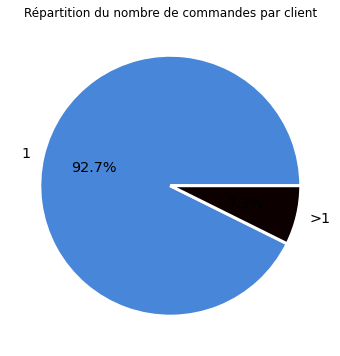

In [33]:
# construction des la table de données groupées pour le pie chart
df_train['freq_class'] = df_train['frequency'].apply(
    lambda x: '>1' if x > 1 else x)
order_count = df_train.groupby('freq_class')[
    'freq_class'].agg(['count'])
order_count


fig, ax = plt.subplots(figsize=(6, 6))
# sns.despine() # supprime le cadre du graph
piechart = ax.pie(x=order_count['count'], wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                  textprops={'size': 'x-large'},
                  labels=order_count.index,
                  autopct='%1.1f%%',
                  colors=['#4886D9', '#0D0000', '#E9F1F2', '#3E608C'])

plt.title("Répartition du nombre de commandes par client")


plt.show()

93 % des clients du jeu de donnée n'ont passé une seule commande

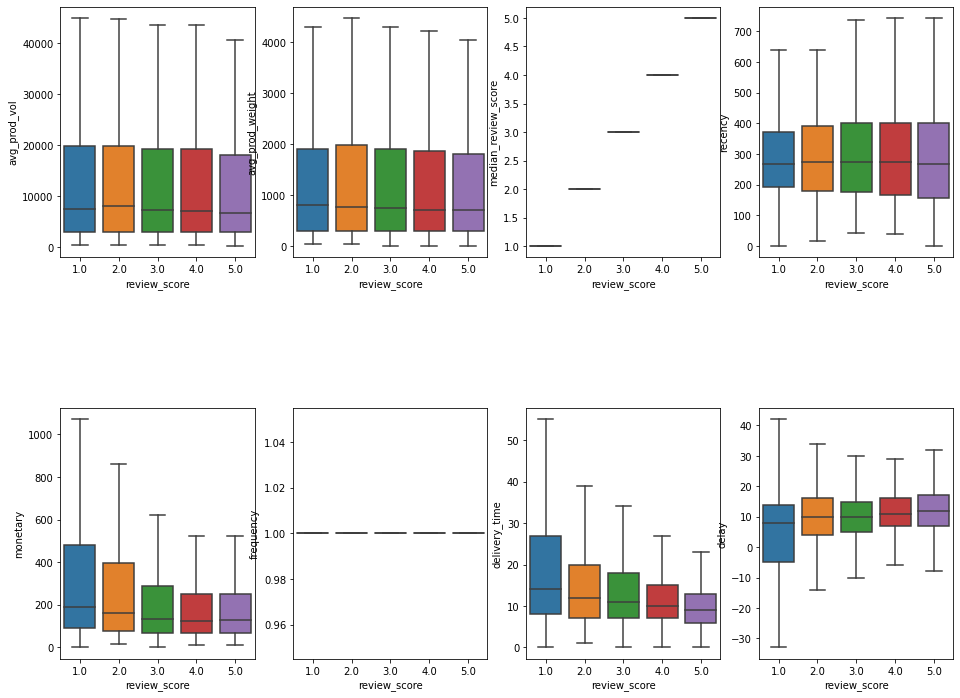

In [34]:
fig, axes = plt.subplots(2, 4, figsize=(16, 12))

plt.subplots_adjust(hspace=.6)


for col, ax in zip(feature_numerical, axes.flatten()):

    sns.boxplot(x=df_train['review_score'].sort_values(),
                y=df_train[col], showfliers=False, ax=ax)


plt.show()

Sans trop de surprise, on observe que la note diminue lorsque le délai de livraison augmente et il en va de même pour le retard. On observe aussi que le notations sont plus sévères pour les produits les plus chers. On trouve dans les mauvaises notes des achats plutôt récents.

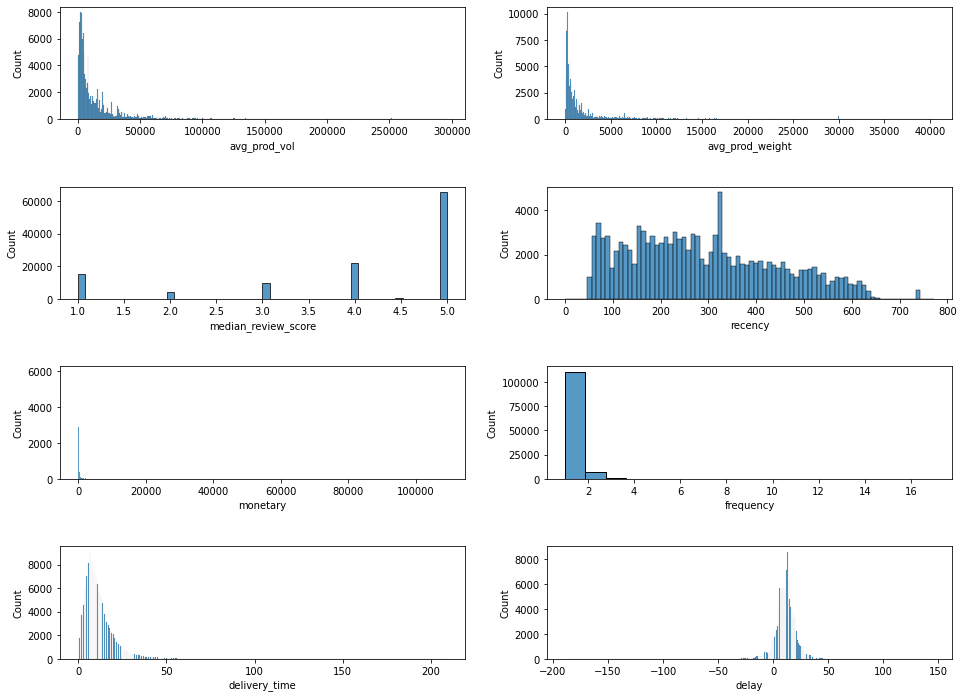

In [65]:
fig, axes = plt.subplots(4, 2, figsize=(16, 12),sharex=False)

plt.subplots_adjust(hspace=.6)


for col, ax in zip(feature_numerical,
                   axes.flatten()):

    sns.histplot(data=df_train[col], ax=ax)


plt.show()

Nous pouvons constater que la majorité des variables numériques présentent des distributions biaisées.

In [36]:
prod_group_count = df_train['product_category_name'].value_counts()

group_share = prod_group_count / prod_group_count.sum()*100
fig_top10 = group_share.nlargest(10)

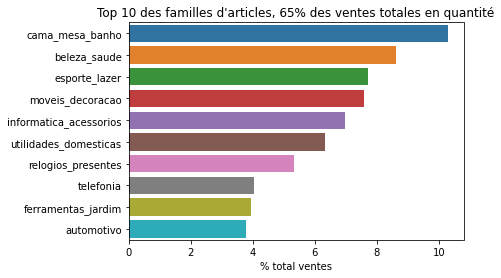

In [37]:
sns.barplot(x=fig_top10, y=fig_top10.index)

title = str(round(fig_top10.sum()))


plt.title("Top 10 des familles d'articles, " +
          title+'% des ventes totales en quantité')
plt.xlabel('% total ventes')
plt.show()

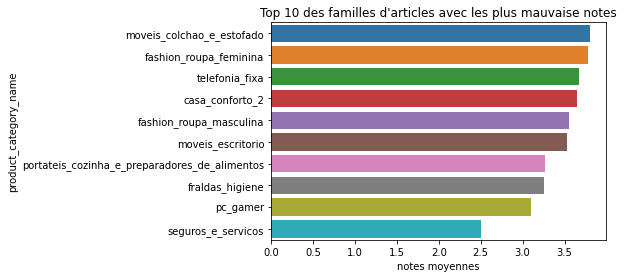

In [38]:
prod_group_rate = df_train.groupby('product_category_name')[
    'review_score'].mean()
prod_group_rate_10 = prod_group_rate.nsmallest(10).sort_values(ascending=False)

sns.barplot(x=prod_group_rate_10, y=prod_group_rate_10.index)


plt.title("Top 10 des familles d'articles avec les plus mauvaise notes")
plt.xlabel('notes moyennes')
plt.show()

# 4-PRE-TRAITEMENT DES DONNEES POUR LE CLUSTERING

Dans cette dernière partie nous allons "standardiser" nos variables numériques et en vue de l'application des divers algorithmes de clustering.

In [39]:
df_train_final = df_train_final.set_index('customer_unique_id')

In [40]:
# on stock les variables catégorielles encodées dans une liste
features_categorical_2 = []
for col in df_train_final.columns:

    if df_train_final[col].dtype == 'uint8':
        features_categorical_2.append(col)

In [41]:
X = df_train_final[feature_numerical]

## Normalisation des variables numériques

In [42]:
X_scaled = StandardScaler().fit_transform(X)

In [43]:
df_train_scaled_encod = pd.DataFrame(
    data=X_scaled, columns=feature_numerical, index=df_train_final.index)

In [44]:
# on fusionne les variables numérique standardisées avec les variables catégorielles encodées
df_train_scaled_encod = pd.concat(
    [df_train_scaled_encod, df_train_final[features_categorical_2]], axis=1)

In [45]:
df_train_scaled_encod =  df_train_scaled_encod[~df_train_scaled_encod.index.duplicated(keep='first')]

In [46]:
df_train_scaled_encod.shape

(96096, 51)

Notre tables comporte 51 variables et 96096 lignes (clients uniques)

## Analyse des corrélations

Nous anlaysons 10 variables les plus corrélées

In [47]:
corr_matrix = df_train_scaled_encod.corr()




In [48]:
def couples_correlation(matrix_corr, threshold=0.7):
    # Créer une copie de la matrice de corrélation pour éviter les modifications sur l'original
    matrix_corr_copy = df_train_scaled_encod.corr().copy().abs()
    # Remplacer les valeurs inférieures au seuil par NaN
    matrix_corr_copy = matrix_corr_copy.mask(matrix_corr_copy <= threshold)
    # Réinitialiser l'index et les colonnes pour faciliter l'itération
    matrix_corr_copy = matrix_corr_copy.reset_index().rename(columns={'index': 'variable1'})
    # Convertir la matrice en un format de tableau long
    matrix_corr_long = pd.melt(matrix_corr_copy, id_vars='variable1', var_name='variable2', value_name='correlation')
    # Filtrer les couples avec une corrélation supérieure au seuil et différente de NaN
    strong_correlations = matrix_corr_long[(matrix_corr_long['correlation'] > threshold) &
                                           (~matrix_corr_long['correlation'].isna()) &
                                            (matrix_corr_long['variable1'] != matrix_corr_long['variable2'])]
    
    
    variables_to_drop = list(set(strong_correlations['variable1']) | set(strong_correlations['variable2']))
    
    return strong_correlations.sort_values(by='correlation',ascending=False)#,variables_to_drop

In [49]:
corr_couples = couples_correlation(df_train_scaled_encod.corr(),threshold=-0.5)
corr_couples


,variable1,variable2,correlation
467,payment_type_boleto,payment_type_credit_card,0.497904
417,payment_type_credit_card,payment_type_boleto,0.497904
1,avg_prod_weight,avg_prod_vol,0.415343
51,avg_prod_vol,avg_prod_weight,0.415343
2505,delivery_time,customer_state_SP,0.376691
...,...,...,...
2551,avg_prod_weight,customer_state_TO,0.000050
1095,customer_state_AC,prod_cat_t10_relogios_presentes,0.000028
1245,prod_cat_t10_relogios_presentes,customer_state_AC,0.000028
2567,prod_cat_t10_ferramentas_jardim,customer_state_TO,0.000024


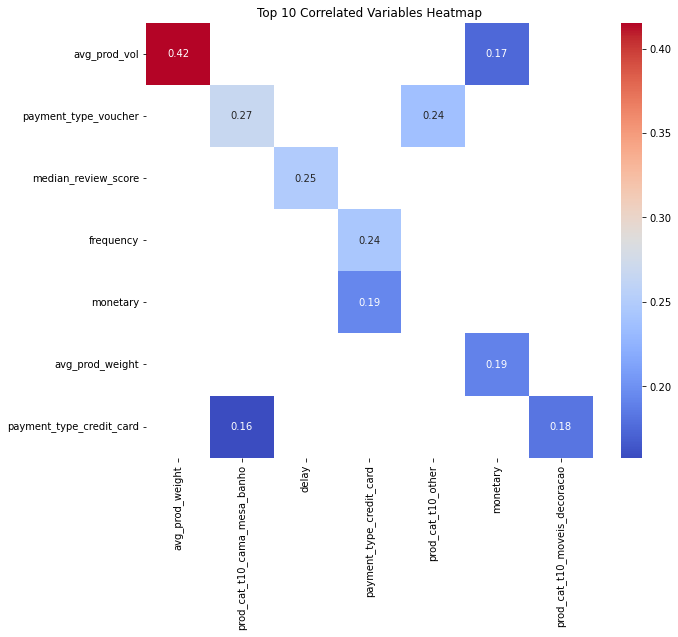

In [50]:
top_corr_variables = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype('bool'))
                      .stack()
                      .sort_values(ascending=False)
                      .head(10))
top_corr_matrix= top_corr_variables.unstack()

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 Correlated Variables Heatmap')
plt.show()

Volume moyen - poids moyen  sont fortement corrélés. Nous allons donc conserver volume moyen pour la suite

In [51]:
#df_train_scaled_encod = df_train_scaled_encod.drop(['delivery_time','avg_prod_weight'],axis=1)

In [52]:
# sauvegarde des données centrées-réduites pour la partie 2 du projet
df_train_scaled_encod.to_csv('p05_part2_source.csv')


# sauvegarde des données brutes pour la partie 2 du projet
df_train_final.to_csv('p05_part2_source_clean.csv')

In [55]:
df_train.to_csv('Part3_train_merged.csv',index=False)

***

Dans la deuxième partie nous allons élaborer notre modèle sur la base de la table *df_train_scaled_encod*